<a href="https://colab.research.google.com/github/rishita-verma01/Assignment07---Multi-Threading/blob/main/multi-threading-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy psutil matplotlib

Threads T=1: CPU Usage: 106.3%
Threads T=2: CPU Usage: 152.3%
Threads T=3: CPU Usage: 163.0%
Threads T=4: CPU Usage: 169.1%
Threads T=5: CPU Usage: 158.1%
Threads T=6: CPU Usage: 152.2%
Threads T=7: CPU Usage: 179.9%
Threads T=8: CPU Usage: 163.3%


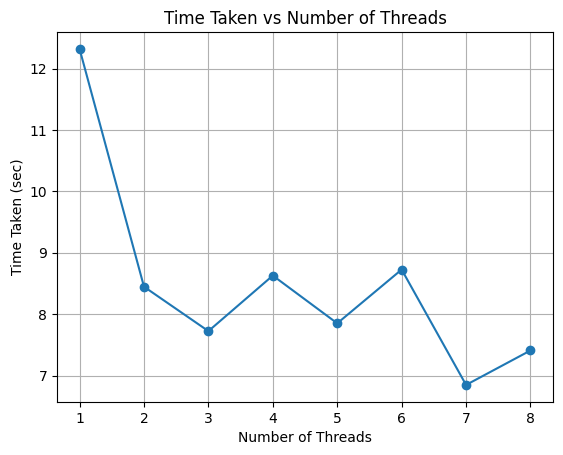

In [2]:
import numpy as np
import os
import time
import multiprocessing
import psutil
import matplotlib.pyplot as plt

def multiply_matrices(n, num_threads):
    constant_matrix = np.random.rand(n, n)
    random_matrices = [np.random.rand(n, n) for _ in range(100)]


    if num_threads > 1:
        os.environ["NUMEXPR_NUM_THREADS"] = str(num_threads)
        os.environ["OMP_NUM_THREADS"] = str(num_threads)


    start_time = time.time()
    result_matrices = [np.matmul(constant_matrix, mat) for mat in random_matrices]
    end_time = time.time()
    time_taken = end_time - start_time

    return time_taken

if __name__ == "__main__":
    n = 1000
    num_threads_list = [1, 2, 3, 4, 5, 6, 7, 8]
    time_taken_list = []

    for num_threads in num_threads_list:

        process = psutil.Process()
        start_cpu_usage = process.cpu_percent()


        time_taken = multiply_matrices(n, num_threads)
        time_taken_list.append(time_taken)

        end_cpu_usage = process.cpu_percent()


        print(f"Threads T={num_threads}: CPU Usage: {end_cpu_usage - start_cpu_usage}%")


    plt.plot(num_threads_list, time_taken_list, marker='o')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time Taken (sec)')
    plt.title('Time Taken vs Number of Threads')
    plt.grid(True)
    plt.show()
